In [47]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('seaborn')

# [4월 18일]
---

## # 데이터 로드
---

In [80]:
from tensorflow.keras.datasets import reuters

(X_data, y_data), (X_test, y_test) = reuters.load_data(num_words = 10000)

X_train = X_data[1000:]
y_train = y_data[1000:]

X_val = X_data[:1000]
y_val = y_data[:1000]

In [81]:
keys, values = np.unique(y_val, return_counts = True)
dict(zip(keys, values))

{0: 6,
 1: 46,
 2: 8,
 3: 354,
 4: 222,
 6: 3,
 7: 1,
 8: 17,
 9: 14,
 10: 17,
 11: 44,
 12: 10,
 13: 20,
 14: 3,
 15: 2,
 16: 47,
 18: 8,
 19: 59,
 20: 25,
 21: 15,
 22: 3,
 23: 3,
 24: 4,
 25: 6,
 26: 2,
 27: 1,
 28: 9,
 30: 6,
 31: 3,
 32: 3,
 33: 2,
 34: 10,
 35: 1,
 36: 4,
 37: 3,
 38: 2,
 39: 1,
 40: 5,
 41: 4,
 42: 3,
 45: 4}

In [82]:
print(f'훈련용 뉴스 기사 : {len(X_train)}')
print(f'테스트용 뉴스 기사 : {len(X_test)}')
num_classes = len(set(y_train))
print(f'카테고리 : {num_classes}')

훈련용 뉴스 기사 : 7982
테스트용 뉴스 기사 : 2246
카테고리 : 46


In [83]:
np.array([len(sample) for sample in X_train]).mean()

145.29015284389877

뉴스 기사의 최대 길이 :2376
뉴스 기사의 평균 길이 :145.29015284389877


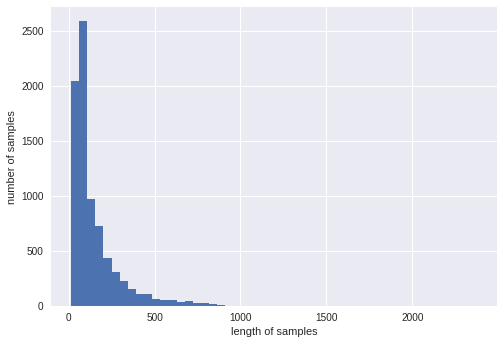

In [84]:
print(f'뉴스 기사의 최대 길이 :{max(len(sample) for sample in X_train)}')
print(f'뉴스 기사의 평균 길이 :{np.array([len(sample) for sample in X_train]).mean()}')

plt.hist([len(sample) for sample in X_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

## # 데이터 전처리
---

### # keras를 사용하여 인코딩
---

In [85]:
vocab_size = 1000
max_len = 100

X_train = pad_sequences(X_train, maxlen = max_len)
X_val = pad_sequences(X_val, maxlen = max_len)
X_test = pad_sequences(X_test, maxlen = max_len)

y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)

In [86]:
y_val

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

## # 모델 구성
---

In [115]:
embedding_dim = 128
hidden_units = 128
num_classes = 46

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(LSTM(hidden_units))
model.add(Dense(num_classes, activation='softmax'))

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)

mc_root = '/content/drive/MyDrive/workspace/cakd5/m9_딥러닝 알고리즘 구현/자연어 처리 (NLP)/best_model.h6'
mc = ModelCheckpoint(mc_root, monitor = 'val_acc', mode = 'max', verbose = 0, save_best_only = True)

model.compile(optimizer = 'adam',
              loss = 'categorical_crossentropy',
              metrics=['acc'])

history = model.fit(X_train, y_train, 
                    batch_size = 512, 
                    epochs = 20, 
                    # callbacks = [es, mc],
                    validation_data = (X_val, y_val))

Epoch 1/20
16/16 [==============================] - 3s 61ms/step - loss: 3.3363 - acc: 0.3302 - val_loss: 2.5226 - val_acc: 0.3540
Epoch 2/20
16/16 [==============================] - 0s 23ms/step - loss: 2.4561 - acc: 0.3128 - val_loss: 2.4045 - val_acc: 0.3540
Epoch 3/20
16/16 [==============================] - 0s 23ms/step - loss: 2.4082 - acc: 0.3514 - val_loss: 2.3813 - val_acc: 0.3540
Epoch 4/20
16/16 [==============================] - 0s 21ms/step - loss: 2.3936 - acc: 0.3514 - val_loss: 2.3639 - val_acc: 0.3540
Epoch 5/20
16/16 [==============================] - 0s 22ms/step - loss: 2.3168 - acc: 0.3664 - val_loss: 2.1451 - val_acc: 0.4630
Epoch 6/20
16/16 [==============================] - 0s 23ms/step - loss: 2.1560 - acc: 0.4624 - val_loss: 2.0494 - val_acc: 0.4950
Epoch 7/20
16/16 [==============================] - 0s 21ms/step - loss: 2.0075 - acc: 0.4883 - val_loss: 1.9382 - val_acc: 0.4720
Epoch 8/20
16/16 [==============================] - 0s 22ms/step - loss: 1.9385 - a

In [107]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_13 (Embedding)    (None, None, 128)         128000    
                                                                 
 lstm_12 (LSTM)              (None, 128)               131584    
                                                                 
 dense_12 (Dense)            (None, 46)                5934      
                                                                 
Total params: 265,518
Trainable params: 265,518
Non-trainable params: 0
_________________________________________________________________


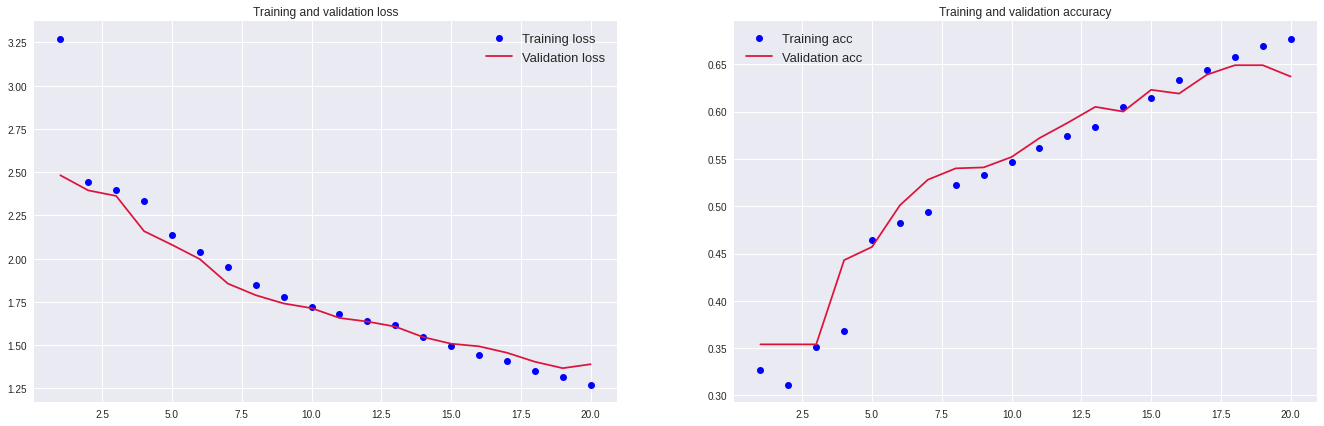

In [113]:
# loaded_model = load_model(mc_root)
# loaded_model.evaluate(X_test, y_test)

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

fig = plt.figure(figsize = (23, 7))

fig.add_subplot(1, 2, 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, color = 'crimson', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(fontsize = 13)

fig.add_subplot(1, 2, 2)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, color = 'crimson', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend(fontsize = 13)

plt.show()